In [1]:
import IPython
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
import adios2

In [2]:
adios  = adios2.ADIOS(configFile="adios2.xml")
io     = adios.DeclareIO("readerIO")
engine = io.Open("diffusion2D.bp", adios2.Mode.Read)
engine.Type()

'SstReader'

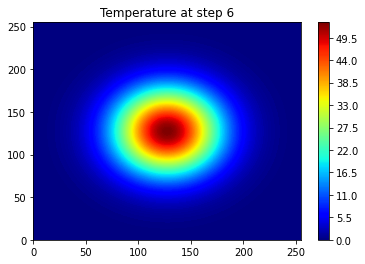

In [ ]:
nprocessed=0
while engine.BeginStep(mode=adios2.StepMode.Read,timeoutSeconds=100.0) != adios2.StepStatus.EndOfStream :
    if nprocessed == 0:
        T_id       = io.InquireVariable("temperature")
        nxy_global = T_id.Shape()
        nxy        = T_id.Count()
        start      = T_id.Start()
        nsteps     = T_id.Steps()
        T_type     = T_id.Type()
        print(nxy_global, nxy, start, nsteps, T_type); sleep(2)        
        T          = np.zeros(nxy_global, dtype=T_type) # Prealocate memory for T
        # T_id.SetSelection((start, nxy)) # SetSelection() would be needed if we were reading the data with multiple MPI processes: this would make sure that every process reads "his" block.        
    engine.Get(T_id, T)
    engine.EndStep()
    IPython.display.clear_output(wait=True) #IPython.clear_output(true) #Passing true says to wait until new ouput before clearing, this prevents flickering
    plt.title('Temperature at step ' + str(engine.CurrentStep()))
    plt.contourf(T, 256, cmap=plt.cm.jet)
    plt.colorbar()
    plt.show()
    nprocessed += 1
    

In [4]:
engine.Close()